In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [18]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
warnings.filterwarnings(action = 'ignore', category=UserWarning)

In [19]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 0 # 设置数据类型为白葡萄酒

# 合并两个df
df = pd.concat([df1,df2], axis=0)

## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]

## 因变量名称
quality = "quality"

In [20]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0, how = 'any') # 只要有行为空，就进行删除操作

X = datas[names]
Y = datas[quality]
Y.ravel()

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [21]:
# # 查看数据
# X.tail()
# np.unique(Y.ravel())
datas.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [22]:
## 创建模型列表
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))
        ])
]

线性回归预测:1阶, 截距:103, 系数: [ 0.00000000e+00  8.50118207e-02 -1.48620723e+00 -6.90416760e-02
  6.23516751e-02 -7.18643184e-01  4.99059722e-03 -1.45047299e-03
 -1.03460590e+02  4.97432666e-01  7.21153860e-01  2.23033948e-01
  3.51639435e-01]
线性回归预测:2阶, 截距:-709, 系数: [ 1.46176848e-05 -2.74516395e+01  9.87661447e+01  2.49676785e+02
 -1.74998936e+01 -1.15483092e+03 -2.43456904e+00  9.13621910e-01
  1.19491590e+03  1.26064734e+02  5.80781882e+01  1.98966670e+01
 -7.77793793e+01 -4.34318333e-02  3.31320952e-02  4.24739823e-01
 -2.31878257e-02 -2.40247894e+00 -7.35719392e-05  3.64009509e-04
  2.78865437e+01  9.27783429e-02  2.07233708e-01  1.34480741e-02
 -5.45491073e-02  4.37670831e-01  8.75879632e-01 -3.84236401e-02
  1.10461091e+00  5.84956242e-03  7.21047495e-03 -1.09383487e+02
  9.44208783e-01  3.90477722e-01  3.15802918e-01  1.20298473e+00
 -1.04158882e+00  6.70367331e-02  6.55542659e+00  8.39269379e-03
 -5.18668354e-04 -2.58961482e+02  1.54314156e+00 -5.12297705e-01
 -1.24440988e-02 -6.56758

Ridge回归预测:2阶, 截距:9, 系数: [ 0.00000000e+00 -4.01950760e+00 -4.60089764e+00 -1.92188313e+00
 -1.23399160e+01  5.95116113e+00 -2.26177275e+00  1.87000389e+00
 -5.73074099e-01  8.09952056e-01 -1.51824556e+00  6.36779636e+00
  7.85743219e-01 -2.49781685e-02 -3.19304374e-02  1.54611802e-01
 -9.10469613e-03 -6.93297154e-01 -2.82827496e-04  1.24966190e-03
  4.29495946e+00  4.65804455e-02  1.43284864e-01 -1.23798665e-02
  1.20930947e-01  2.33387837e-01  7.72556808e-01 -6.10987046e-02
  1.14028323e+00  5.30296101e-03  8.40966110e-03 -4.15791092e+00
  3.33768806e-01 -5.23991271e-02  4.61164353e-01  1.34510706e+00
 -9.92879504e-01 -2.75135389e-02  5.56754741e+00  1.04088252e-02
 -1.57266538e-03 -1.96957349e+00  2.61311550e-01 -7.70780075e-01
  2.63864261e-01 -1.07712273e+00 -7.08985783e-03 -2.27389490e-01
 -1.28127006e-03  8.40135850e-04  1.29170765e+01 -1.27632773e-01
 -5.04961905e-02  1.22562531e-02  1.07167029e-02  1.72588884e+00
  1.44502094e-02  2.36057117e-03  6.14187015e+00 -7.42621791e-01
 

Lasso回归预测:2阶, 截距:9, 系数: [ 0.00000000e+00 -8.36148167e-03 -5.66620821e-01 -0.00000000e+00
  1.13912448e-01  0.00000000e+00 -4.19775574e-02  4.86804701e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.14456124e-01
  4.70298805e-02 -1.88787712e-02 -2.03293677e-01 -0.00000000e+00
  6.47920970e-03 -2.54053503e-02  1.05821763e-03 -5.75194191e-05
  2.07741528e-01  6.02832690e-02  8.19681154e-02 -1.82682969e-02
  1.75330991e-01  5.93929884e-02  3.71096449e-01 -1.40209721e-02
  0.00000000e+00  6.43521575e-04  5.49611234e-03 -1.45682284e+00
 -8.59552544e-01 -0.00000000e+00  3.48071984e-01  1.63676185e+00
 -8.54941498e-01 -2.95331388e-02  0.00000000e+00  5.08642517e-03
 -7.63032643e-04 -0.00000000e+00 -2.67424425e-01 -7.08015112e-01
  1.82655768e-01 -3.95411406e-01 -3.65930085e-04 -1.44157414e-01
 -8.54311835e-04  2.46834100e-04  2.82654085e-02 -4.47095579e-02
 -1.24220949e-02  5.69718413e-04  1.36282354e-02  0.00000000e+00
  2.11038259e-02 -2.25515838e-03  0.00000000e+00  5.70381836e-02
 

ElasticNet预测:1阶, 截距:2, 系数: [ 0.00000000e+00 -3.90561217e-04 -1.54502094e+00 -1.02627764e-01
  2.32270541e-02 -8.53392514e-01  5.66252559e-03 -1.81072304e-03
 -4.19137576e-01  1.00980373e-01  5.78686888e-01  3.35621847e-01
  1.26777255e-01]
ElasticNet预测:2阶, 截距:9, 系数: [ 0.00000000e+00  1.57665330e-02 -6.54944634e-01 -1.87731714e-01
  1.07822795e-01  4.65612851e-01 -4.39977849e-02  5.00478275e-03
 -2.56088946e-01  2.31885537e-01  1.53761832e-01 -3.20963819e-01
  2.40149684e-01 -2.00601346e-02 -2.13485618e-01  2.20751566e-02
  6.33808540e-03 -1.31166055e-01  1.11435179e-03 -9.22063796e-05
  2.43434351e-01  4.94936148e-02  9.24671811e-02 -1.91498173e-02
  1.83590979e-01  2.88870272e-01  7.15114349e-01 -1.62813925e-02
  1.29668322e-01  2.29732222e-03  4.68202145e-03 -8.94521255e-01
 -1.05057435e+00 -5.61397229e-02  3.52905231e-01  1.49000309e+00
 -8.81178426e-01 -2.77772600e-02  6.94911481e-01  5.96664309e-03
 -9.90204339e-04 -3.40006316e-01 -3.07222536e-01 -7.17070088e-01
  2.19461350e-01 -

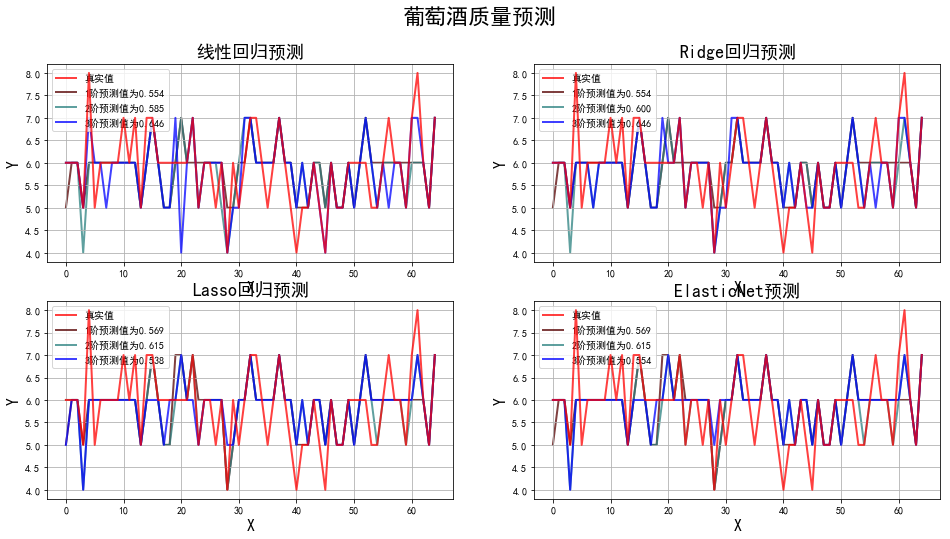

In [24]:
plt.figure(figsize=(16,8), facecolor='w')
titles = u'线性回归预测', u'Ridge回归预测', u'Lasso回归预测', u'ElasticNet预测'

## 将数据分为训练数据和测试数据
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

## 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶
m = len(d_pool)
clrs = [] # 颜色
for c in np.linspace(5570560, 255, m):
    clrs.append('#%06x' % int(c))


for t in range(4):
    plt.subplot(2, 2, t + 1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r', lw=2, alpha=0.75, zorder=10, label=u'真实值')
    for i,d in enumerate(d_pool):
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train, Y_train)
        # 模型预测及计算R^2
        Y_pre = model.predict(X_test)
        ## NOTE: 将Y_pre这种连续性的预测值，转换为离散形式的（转换方式：四舍五入）
        ## NOTE: 既然变成分类的应用的话，那么模型评估指标就不能用R^2，
        ## NOTE: 这里用准确率(两种方式实现，一：numpy原始的实现，二：基于sklearn的相关API实现)
        Y_pre=np.around(Y_pre,0)
     
        R=np.mean(np.equal(Y_test, Y_pre))
        
        # R = model.score(X_train, Y_train)      
        # 输出信息
        lin = model.get_params('Linear')['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output, lin.coef_)
        ## 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2,alpha=0.75, zorder=i, label=u'%d阶预测值为%.3f' % (d,R))
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle(u'葡萄酒质量预测', fontsize=22)
plt.show()